# Movie Rating Prediction

### Aim:
 - Predict ratings of a movie
 - O/P: Between 0.0 to 10.0

Dataset: [Click Here](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)

Auth: KG   
Date: 07.05.2024

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv('Data/IMDb Movies India.csv', encoding='latin-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
data.dropna(inplace=True)
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [12]:
genres = data['Genre'].value_counts()
genres

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

C:\Users\Kushal Gupta\AppData\Local\Temp\ipykernel_9976\2159679956.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


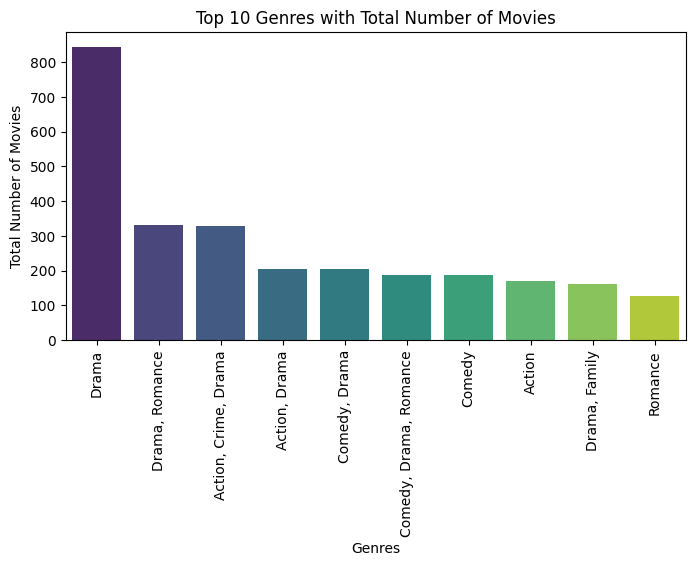

In [13]:
plt.figure(figsize=(8, 4))
ax = sb.barplot(x=genres.head(10).index, y=genres.head(10).values, hue=genres.head(10).index, palette='viridis', legend=False)
ax.set_xlabel('Genres')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 10 Genres with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [14]:
directors = data['Director'].value_counts()
directors

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: count, Length: 2431, dtype: int64

C:\Users\Kushal Gupta\AppData\Local\Temp\ipykernel_9976\82470209.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


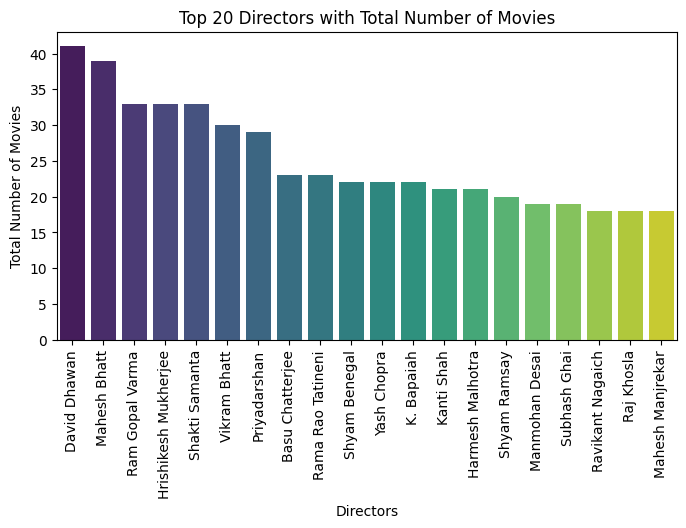

In [15]:
plt.figure(figsize=(8, 4))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, hue=directors.head(20).index, palette='viridis', legend=False)
ax.set_xlabel('Directors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Directors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [16]:
actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']]).value_counts()
actors

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
                     ... 
Rajeev Dassani          1
Rehaan Engineer         1
Glenn                   1
Pernia Qureshi          1
Shatakshi Gupta         1
Name: count, Length: 5041, dtype: int64

C:\Users\Kushal Gupta\AppData\Local\Temp\ipykernel_9976\1646723422.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


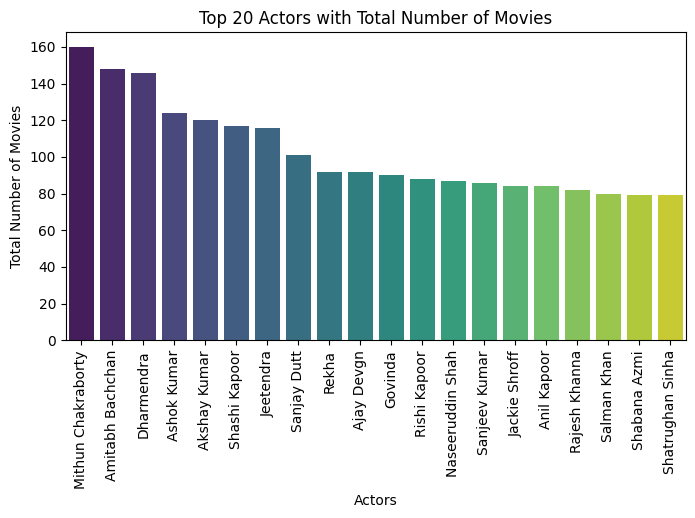

In [17]:
plt.figure(figsize=(8, 4))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, hue=actors.head(20).index, palette='viridis', legend=False)
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [18]:
def clean_duration(duration):
    if isinstance(duration, str):
        return float(''.join(filter(str.isdigit, duration)))
    return duration

#Applying the custom function
data['Duration'] = data['Duration'].apply(clean_duration)

In [19]:
data['Votes'] = data['Votes'].astype(str)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.strip('()').astype(int)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   float64
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 442.1+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115.0,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153.0,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [20]:
data = data.drop(columns=['Name'])
actor1_encoding_map = data.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = data.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = data.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = data.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = data.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [21]:
data['encoded_actor1'] = round(data['Actor 1'].map(actor1_encoding_map['Rating']),1)
data['encoded_actor2'] = round(data['Actor 2'].map(actor2_encoding_map['Rating']),1)
data['encoded_actor3'] = round(data['Actor 3'].map(actor3_encoding_map['Rating']),1)
data['encoded_director'] = round(data['Director'].map(director_encoding_map['Rating']),1)
data['encoded_genre'] = round(data['Genre'].map(genre_encoding_map['Rating']),1)

In [22]:
data.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
data

,Year,Duration,Rating,Votes,encoded_actor1,encoded_actor2,encoded_actor3,encoded_director,encoded_genre
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.4
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.9,5.3,6.2
6,2005,142.0,7.4,1086,5.4,6.9,6.5,7.4,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5
...,...,...,...,...,...,...,...,...,...
15493,2015,115.0,6.1,408,6.7,6.1,5.8,6.1,6.4
15494,2001,153.0,6.2,1496,4.2,5.8,6.0,7.2,7.0
15503,1989,125.0,5.8,44,6.3,5.8,6.0,6.3,5.7
15505,1999,129.0,4.5,655,5.5,4.6,5.7,5.2,5.5


In [23]:
test_data = data.drop(columns=['Rating'])
test_data

,Year,Duration,Votes,encoded_actor1,encoded_actor2,encoded_actor3,encoded_director,encoded_genre
1,2019,109.0,8,6.8,7.0,7.0,7.0,6.4
3,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,827,4.8,5.8,5.9,5.3,6.2
6,2005,142.0,1086,5.4,6.9,6.5,7.4,6.8
8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5
...,...,...,...,...,...,...,...,...
15493,2015,115.0,408,6.7,6.1,5.8,6.1,6.4
15494,2001,153.0,1496,4.2,5.8,6.0,7.2,7.0
15503,1989,125.0,44,6.3,5.8,6.0,6.3,5.7
15505,1999,129.0,655,5.5,4.6,5.7,5.2,5.5


In [24]:
ratings = data['Rating']
ratings

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(test_data, ratings, test_size=0.25, random_state=52)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4244, 8) (1415, 8) (4244,) (1415,)


In [26]:
print('Ridge model:')

ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
Ridge()

X_test_prediction = ridge_model.predict(X_test)

mse = mean_squared_error(Y_test, X_test_prediction)
mae = mean_absolute_error(Y_test, X_test_prediction)
r2 = r2_score(Y_test, X_test_prediction)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

results = pd.DataFrame({
    'Actual': Y_test,  # Actual target values
    'Predicted': X_test_prediction  # Predicted target values
})

results['Squared Error'] = (results['Actual'] - results['Predicted'])**2  # Squared errors
results['Absolute Error'] = abs(results['Actual'] - results['Predicted'])  # Absolute errors
results

Ridge model:
Mean Squared Error: 0.4286257005126376
Mean Absolute Error: 0.4748735753809883
R-squared (R2) Score: 0.7750970276271782


,Actual,Predicted,Squared Error,Absolute Error
12957,7.4,7.489256,0.007967,0.089256
2951,6.2,5.888064,0.097304,0.311936
14983,7.8,7.201009,0.358790,0.598991
11628,7.6,7.292826,0.094356,0.307174
12836,2.3,3.324045,1.048668,1.024045
...,...,...,...,...
10674,7.1,7.058853,0.001693,0.041147
514,5.1,6.228865,1.274337,1.128865
4333,7.7,7.668193,0.001012,0.031807
3845,6.7,7.022761,0.104175,0.322761


In [30]:
print('Linear Regression Model: ')

linearregr_model = LinearRegression()
linearregr_model.fit(X_train, Y_train)
LinearRegression()

X_test_prediction = linearregr_model.predict(X_test)

mse = mean_squared_error(Y_test, X_test_prediction)
mae = mean_absolute_error(Y_test, X_test_prediction)
r2 = r2_score(Y_test, X_test_prediction)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

results = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': X_test_prediction,
    'Squared Error': (Y_test - X_test_prediction)**2,
    'Absolute Error': abs(Y_test - X_test_prediction)
})

results

Linear Regression Model: 
Mean Squared Error: 0.42861819925902866
Mean Absolute Error: 0.47487411264905754
R-squared (R2) Score: 0.775100963588627


,Actual,Predicted,Squared Error,Absolute Error
12957,7.4,7.489312,0.007977,0.089312
2951,6.2,5.888049,0.097313,0.311951
14983,7.8,7.201094,0.358689,0.598906
11628,7.6,7.292835,0.094350,0.307165
12836,2.3,3.323915,1.048401,1.023915
...,...,...,...,...
10674,7.1,7.058911,0.001688,0.041089
514,5.1,6.228890,1.274393,1.128890
4333,7.7,7.668300,0.001005,0.031700
3845,6.7,7.022798,0.104198,0.322798


In [28]:
def test_model(model, input_values):
    predictions = model.predict(input_values)
    return predictions

In [29]:
# Year, Duration, Votes, encoded_actor1, encoded_actor2, encoded_actor3, encoded_director, encoded_genre
input_values = [[2019, 109.0, 8, 6.8, 7.0, 7.0, 7.0, 6.4]]

predictions = test_model(ridge_model, input_values)
print(predictions)

predictions = test_model(linearregr_model, input_values)
print(predictions)

[7.20391181]
[7.20403231]


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
